# Part A - Preprocessing

Data in the real world is almost never clean. Often before doing anything with it, we have to clean it, which can involve many different steps. In this task, the aim is to explore a messy dataset, and correct any issues you may find. This is a required step before any visualization, which will take place in part B. 

Below you are given a data set that contains details of a bank's customers. The task here is to use the preprocessing techniques that we’ve shown in the class to clean and transform this data set.


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data from CSV file 
data=pd.read_csv("churn_data_before_processing.csv", sep=",",index_col=0)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,3613,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,4438,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,6550,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,4591,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [3]:
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,6,15574012,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822.0,France,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376.0,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
9,10,15592389,NaN,684.0,France,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0


In [4]:
data.tail(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4286,4287,15694404,Eberegbulam,781.0,France,Female,42.0,3.0,156555.54,1.0,1.0,1.0,175674.01,0
2997,2998,15756820,Fleming,655.0,France,Female,26.0,NaN,106198.50,1.0,0.0,1.0,32020.42,0
3419,3420,15684103,Mellor,674.0,France,Female,26.0,10.0,0.00,2.0,1.0,1.0,138423.10,0
3856,3857,15653306,Ermakova,679.0,Germany,Female,32.0,0.0,88335.05,NaN,0.0,0.0,159584.81,0
1125,1126,15645316,Han,612.0,Germany,Female,58.0,1.0,149641.53,1.0,1.0,1.0,115161.28,0
7758,7759,15684358,Kang,711.0,France,Male,41.0,3.0,0.00,2.0,1.0,1.0,193747.57,0
4704,4705,15754113,Li,588.0,France,Female,35.0,0.0,0.00,2.0,1.0,1.0,155485.24,0
7210,7211,15800773,Ikenna,648.0,Spain,Female,28.0,9.0,102282.61,1.0,1.0,1.0,157891.11,0
4450,4451,15791191,Mitchell,633.0,France,Male,59.0,2.0,103996.74,1.0,1.0,1.0,103159.11,0
6523,6524,15806249,Kerr,671.0,Spain,Female,31.0,4.0,0.00,2.0,0.0,1.0,79270.02,0


# 1 Uni-Variant Analysis:


a. Type of each feature

In [5]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

b.	Mean, median, quantiles for continues

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10150.000000,1.015000e+04,10132.000000,9879.000000,10070.000000,9.994000e+03,9862.000000,10067.000000,10063.000000,10106.000000,10150.000000
mean,4997.098227,1.569101e+07,650.907473,38.939872,5.017389,7.679001e+04,1.528308,0.706069,0.514360,100019.204030,0.203547
std,2885.764065,7.197967e+04,100.228981,10.566406,2.926806,6.370272e+04,0.592606,0.455583,0.499819,57493.323246,0.402656
min,1.000000,1.556570e+07,350.000000,-49.000000,-5.000000,0.000000e+00,-2.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562831e+07,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.000000,0.000000,50909.212500,0.000000
50%,4995.500000,1.569086e+07,652.000000,37.000000,5.000000,9.726268e+04,1.000000,1.000000,1.000000,100000.325000,0.000000
75%,7493.000000,1.575355e+07,718.000000,44.000000,7.000000,1.276779e+05,2.000000,1.000000,1.000000,149370.550000,0.000000
max,10000.000000,1.581569e+07,2924.008649,92.000000,40.066513,1.036826e+06,11.177460,1.000000,1.000000,199992.480000,1.000000


In [7]:
data["RowNumber"].mean()

4997.098226600985

c.	Histogram or frequency tables for categorical

<AxesSubplot:ylabel='Frequency'>

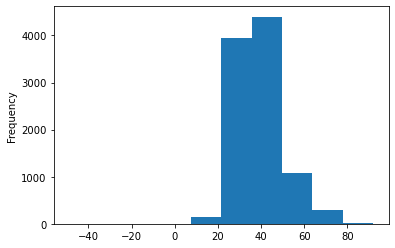

In [8]:
data["Age"].plot(kind="hist") # by replacing Age with coloums (Tenure,Balance, NumOfProducts, HasCrCard,IsActiveMember,EstimatedSalary )
                              #you can visulize there respactive histogram/frequency plots

# 2.	Are there duplicates? If so, remove them.

In [9]:
#shows number of rows that are duplicate in our data
data[data.duplicated()] 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6481,6482,15664752,Jack,606.0,Germany,Male,39.0,8.0,136000.45,2.0,1.0,0.0,31708.53,0
4317,4318,15592194,Metcalf,492.0,France,Female,28.0,9.0,0.00,2.0,1.0,0.0,95957.09,0
6295,6296,15621550,Hung,535.0,Spain,Female,50.0,1.0,140292.58,3.0,0.0,0.0,69531.22,1
9488,9489,15659355,McKenzie,671.0,Spain,Male,32.0,6.0,123912.78,2.0,1.0,1.0,146636.44,0
6493,6494,15723671,Lucciano,661.0,France,Male,35.0,9.0,100107.99,1.0,1.0,0.0,83949.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,6524,15806249,Kerr,671.0,Spain,Female,31.0,4.0,0.00,2.0,0.0,1.0,79270.02,0
3612,3613,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,4438,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,6550,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0


In [10]:
#Keeps the first occuring row and delets the remainig repetative data
data=data.drop_duplicates(keep='first')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7511,7512,15686913,Kung,757.0,France,Male,NaN,0.0,0.00,1.0,1.0,0.0,83263.06,0
8610,8611,15731553,Lucas,730.0,France,Male,23.0,8.0,0.00,2.0,1.0,0.0,183284.53,0
2997,2998,15756820,Fleming,655.0,France,Female,26.0,NaN,106198.50,1.0,0.0,1.0,32020.42,0
3856,3857,15653306,Ermakova,679.0,Germany,Female,32.0,0.0,88335.05,NaN,0.0,0.0,159584.81,0


In [11]:
# recheck if there are any duplicates left or not
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# 3.	Outliers & 4.	Missing values:

* 3a.	Identify the outliers 
* 3b.	Choose the correct treatment
* 4a.	Identify missing values
* 4b.	Impute missing values with your preferred way



# CustomerId

In [12]:
data["CustomerId"].value_counts(dropna=False) # has some repeated values but that will be handeled later

15615096    2
15645766    2
15591980    2
15794266    2
15761487    2
           ..
15654292    1
15648320    1
15726747    1
15694510    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [13]:
pd.isna(data["CustomerId"]).sum()# no missing value

0

<AxesSubplot:>

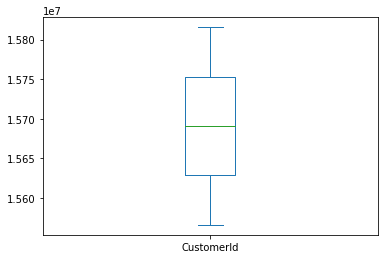

In [14]:
data["CustomerId"].plot(kind="box") # no outliers

# Surname

In [15]:
data["Surname"].value_counts(dropna=False)

NaN           94
Smith         32
Martin        29
Scott         29
Walker        28
              ..
Fishbourne     1
McIver         1
Valentin       1
Izmailov       1
Burbidge       1
Name: Surname, Length: 2926, dtype: int64

In [16]:
pd.isna(data["Surname"]).sum() # we have NuN values

94

In [17]:
# replace NaN with Unknown
data.loc[pd.isna(data["Surname"]),"Surname"]= "Unknown_Surname"

In [18]:
data["Surname"].value_counts(dropna=False)

Unknown_Surname    94
Smith              32
Martin             29
Scott              29
Walker             28
                   ..
Fishbourne          1
McIver              1
Valentin            1
Izmailov            1
Burbidge            1
Name: Surname, Length: 2926, dtype: int64

# CreditScore

In [19]:
pd.isna(data["CreditScore"]).sum()# has missing value

18

In [20]:
data["CreditScore"].describe()

count    10028.000000
mean       650.895046
std        100.319047
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max       2924.008649
Name: CreditScore, dtype: float64

<AxesSubplot:>

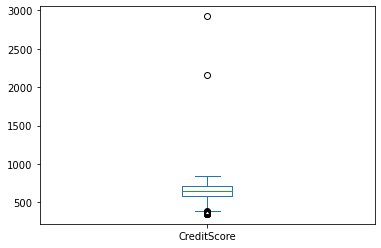

In [21]:
data["CreditScore"].plot(kind="box")# has outliers at >1000 and <400

In [22]:
data.loc[data["CreditScore"]<400]# no outliers under 0

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376.0,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1
942,943,15804586,Lin,376.0,France,Female,46.0,6.0,0.00,1.0,1.0,0.0,157333.69,1
1193,1194,15779947,Thomas,363.0,Spain,Female,28.0,6.0,146098.43,3.0,1.0,0.0,100615.14,1
1201,1202,15651052,McMasters,399.0,Germany,Male,46.0,2.0,127655.22,1.0,1.0,0.0,139994.68,1
1405,1406,15612494,Panicucci,359.0,France,Female,44.0,6.0,128747.69,1.0,1.0,0.0,146955.71,1
1631,1632,15685372,Azubuike,350.0,Spain,Male,54.0,1.0,152677.48,1.0,1.0,1.0,191973.49,1
1838,1839,15758813,Campbell,350.0,Germany,Male,39.0,0.0,109733.20,2.0,0.0,0.0,123602.11,1
1962,1963,15692416,Aikenhead,358.0,Spain,Female,52.0,8.0,143542.36,3.0,1.0,0.0,141959.11,1
2473,2474,15679249,Chou,351.0,Germany,Female,57.0,4.0,163146.46,1.0,1.0,0.0,169621.69,1
2579,2580,15597896,Ozoemena,365.0,Germany,Male,30.0,0.0,127760.07,1.0,1.0,0.0,81537.85,1


In [23]:
# median replacement for outliers and unknowns
CreditScore_value_replacement=data["CreditScore"].median()
data.loc[
    (data["CreditScore"]>1200)
    | (data["CreditScore"]<400)
    |pd.isna(data["CreditScore"])

    ,"CreditScore"

]=CreditScore_value_replacement

<AxesSubplot:>

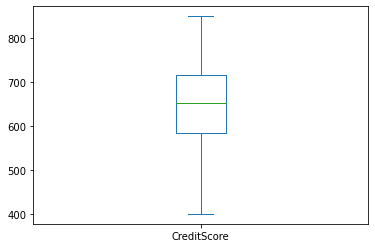

In [24]:
data["CreditScore"].plot(kind="box") # dont have outliers anymore

<AxesSubplot:ylabel='Frequency'>

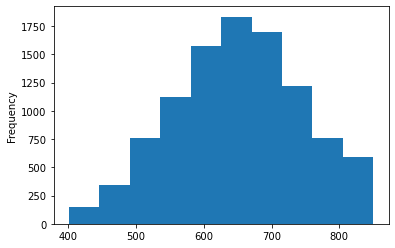

In [25]:
data["CreditScore"].plot(kind="hist")

In [26]:
data["CreditScore"].describe()

count    10046.000000
mean       651.058929
std         95.670487
min        401.000000
25%        584.000000
50%        652.000000
75%        717.000000
max        850.000000
Name: CreditScore, dtype: float64

# Geography

In [27]:
data["Geography"].value_counts(dropna=False)

France     4941
Germany    2463
Spain      2446
NaN         196
Name: Geography, dtype: int64

In [28]:
# replace NaN with Unknown as there cannot be any outliers in a non nuarical values
data.loc[pd.isna(data["Geography"]),"Geography"]= "Unknown_Geography"

In [29]:
data["Geography"].value_counts(dropna=False)

France               4941
Germany              2463
Spain                2446
Unknown_Geography     196
Name: Geography, dtype: int64

# Gender

In [30]:
data["Gender"].value_counts(dropna=False)

Male      5323
Female    4440
NaN        283
Name: Gender, dtype: int64

In [31]:
data.loc[pd.isna(data["Gender"]),"Gender"]= "Unknown_Gender"

In [32]:
data["Gender"].value_counts(dropna=False)

Male              5323
Female            4440
Unknown_Gender     283
Name: Gender, dtype: int64

# Age

In [33]:
data.loc[2444]

RowNumber               2445
CustomerId          15572461
Surname                 Kung
CreditScore            663.0
Geography            Germany
Gender                Female
Age                     29.0
Tenure                   4.0
Balance            102714.65
NumOfProducts            2.0
HasCrCard                0.0
IsActiveMember           0.0
EstimatedSalary     21170.81
Exited                     0
Name: 2444, dtype: object

In [34]:
pd.isna(data["Age"]).sum()# has missing value

271

In [35]:
data["Age"].describe()

count    9775.000000
mean       38.945269
std        10.568860
min       -49.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

<AxesSubplot:>

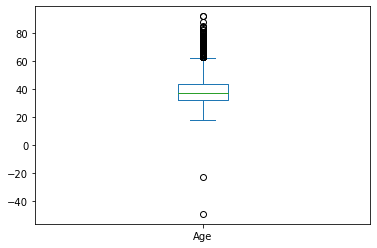

In [36]:
data["Age"].plot(kind="box")# has outliers at >62 and <20

In [37]:
# median replacement for outliers and unknowns
Age_value_replacement=data["Age"].median()# if i substitute 54 instead of 62(which i got from the orignal box plot) the outlyers go away
data.loc[
    (data["Age"]>62)
    | (data["Age"]<20)
    |pd.isna(data["Age"])

    ,"Age"

]=Age_value_replacement

<AxesSubplot:>

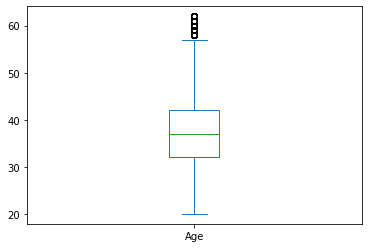

In [38]:
data["Age"].plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

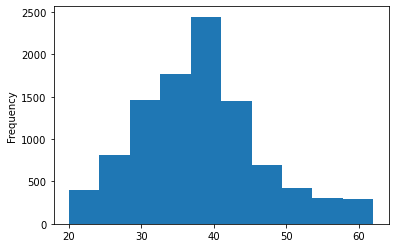

In [39]:
data["Age"].plot(kind="hist")

In [40]:
data["Age"].describe()

count    10046.000000
mean        37.860143
std          8.437823
min         20.000000
25%         32.000000
50%         37.000000
75%         42.000000
max         62.000000
Name: Age, dtype: float64

# Tenure

In [41]:
pd.isna(data["Tenure"]).sum()

80

In [42]:
data["Tenure"].describe()

count    9966.000000
mean        5.016768
std         2.926688
min        -5.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        40.066513
Name: Tenure, dtype: float64

<AxesSubplot:>

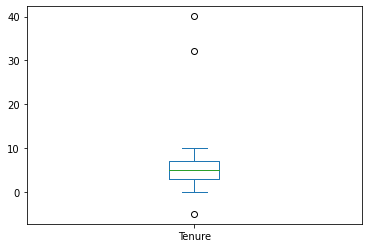

In [43]:
data["Tenure"].plot(kind="box") # has outliers <0 & >15

In [44]:
# replacing oulier values with there median also know as meadian replacement method
Tenure_value_replacement=data["Tenure"].median()
data.loc[
    (data["Tenure"]>15)
    | (data["Tenure"]<0)
    |pd.isna(data["Tenure"])

    ,"Tenure"

]=Tenure_value_replacement

<AxesSubplot:>

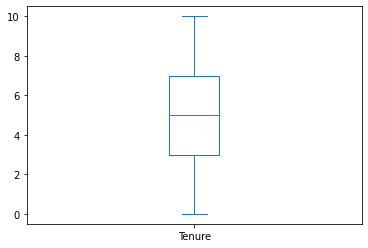

In [45]:
data["Tenure"].plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

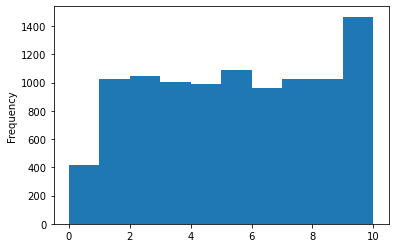

In [46]:
data["Tenure"].plot(kind="hist")

In [47]:
data["Tenure"].describe()

count    10046.000000
mean         5.011447
std          2.879627
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

# Balance

In [48]:
pd.isna(data["Balance"]).sum()

156

In [49]:
data["Balance"].describe()

count    9.890000e+03
mean     7.675722e+04
std      6.370337e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.726268e+04
75%      1.276520e+05
max      1.036826e+06
Name: Balance, dtype: float64

<AxesSubplot:>

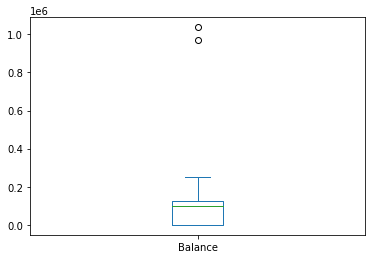

In [50]:
data["Balance"].plot(kind="box")

In [51]:
Balance_value_replacement=data["Balance"].median()
data.loc[
    (data["Balance"]>0.3e6)
    | (data["Balance"]<0)
    |pd.isna(data["Balance"])

    ,"Balance"

]=Balance_value_replacement

<AxesSubplot:>

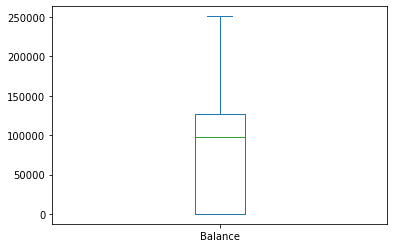

In [52]:
data["Balance"].plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

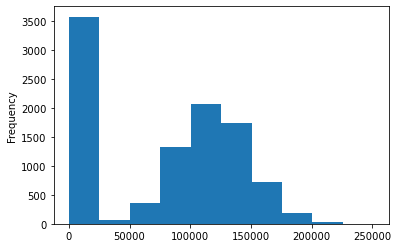

In [53]:
data["Balance"].plot(kind="hist")

In [54]:
data["Balance"].describe()

count     10046.000000
mean      76895.262219
std       61891.346410
min           0.000000
25%           0.000000
50%       97262.675000
75%      127257.587500
max      250898.090000
Name: Balance, dtype: float64

# NumOfProducts

In [55]:
pd.isna(data["NumOfProducts"]).sum()

288

In [56]:
data["NumOfProducts"].describe()

count    9758.000000
mean        1.528098
std         0.593187
min        -2.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.177460
Name: NumOfProducts, dtype: float64

<AxesSubplot:>

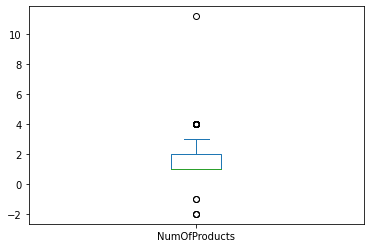

In [57]:
data["NumOfProducts"].plot(kind="box")

In [58]:
data["NumOfProducts"].loc[7332]

2.0

In [59]:
NumOfProducts_value_replacement=data["NumOfProducts"].median()
data.loc[
    (data["NumOfProducts"]>3)
    | (data["NumOfProducts"]<0)
    |pd.isna(data["NumOfProducts"])

    ,"NumOfProducts"

]=NumOfProducts_value_replacement

<AxesSubplot:>

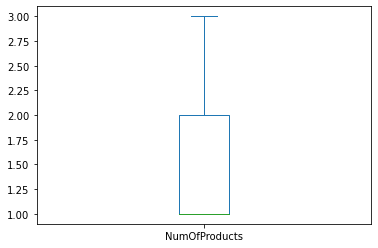

In [60]:
data["NumOfProducts"].plot(kind="box")

<AxesSubplot:ylabel='Frequency'>

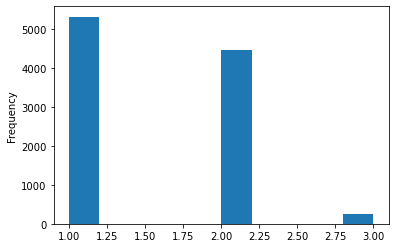

In [61]:
data["NumOfProducts"].plot(kind="hist")

In [62]:
data["NumOfProducts"].describe()

count    10046.000000
mean         1.495919
std          0.548615
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: NumOfProducts, dtype: float64

# HasCrCard

In [63]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,6,15574012,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822.0,France,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0
7,8,15656148,Obinna,652.0,Germany,Female,29.0,4.0,115046.74,1.0,1.0,0.0,119346.88,1
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
9,10,15592389,Unknown_Surname,684.0,France,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0


In [64]:
pd.isna(data["HasCrCard"]).sum()

83

In [65]:
data["HasCrCard"].describe()

count    9963.000000
mean        0.705510
std         0.455836
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HasCrCard, dtype: float64

<AxesSubplot:>

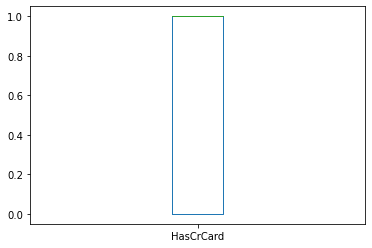

In [66]:
data["HasCrCard"].plot(kind="box") # no out liers

In [67]:
data["HasCrCard"].median()

1.0

In [68]:
HasCrCard_value_replacement=data["HasCrCard"].median()
data.loc[
    pd.isna(data["HasCrCard"])

    ,"HasCrCard"

]=HasCrCard_value_replacement

In [69]:
data["HasCrCard"].describe()

count    10046.000000
mean         0.707943
std          0.454731
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HasCrCard, dtype: float64

<AxesSubplot:ylabel='Frequency'>

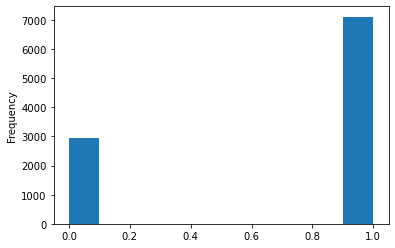

In [70]:
data["HasCrCard"].plot(kind="hist")

# IsActiveMember

In [71]:
pd.isna(data["IsActiveMember"]).sum() # has NaN values

87

In [72]:
data["IsActiveMember"].describe()

count    9959.000000
mean        0.514710
std         0.499809
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: IsActiveMember, dtype: float64

<AxesSubplot:>

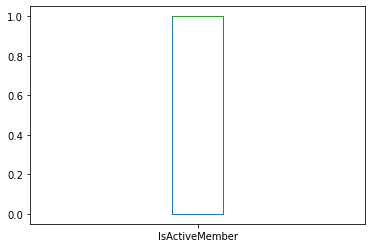

In [73]:
data["IsActiveMember"].plot(kind="box") # no outliers

In [74]:
IsActiveMember_value_replacement=data["IsActiveMember"].median()
data.loc[
    pd.isna(data["IsActiveMember"])

    ,"IsActiveMember"

]=IsActiveMember_value_replacement

<AxesSubplot:ylabel='Frequency'>

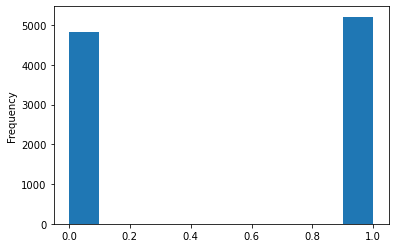

In [75]:
data["IsActiveMember"].plot(kind="hist")

In [76]:
data["IsActiveMember"].describe()

count    10046.000000
mean         0.518913
std          0.499667
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64

# EstimatedSalary

In [77]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,1.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,6,15574012,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822.0,France,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0
7,8,15656148,Obinna,652.0,Germany,Female,29.0,4.0,115046.74,1.0,1.0,0.0,119346.88,1
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
9,10,15592389,Unknown_Surname,684.0,France,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0


In [78]:
pd.isna(data["EstimatedSalary"]).sum() # has NaN values

44

In [79]:
data["EstimatedSalary"].describe()

count     10002.000000
mean     100079.821011
std       57489.484584
min          11.580000
25%       50983.750000
50%      100168.240000
75%      149370.550000
max      199992.480000
Name: EstimatedSalary, dtype: float64

<AxesSubplot:>

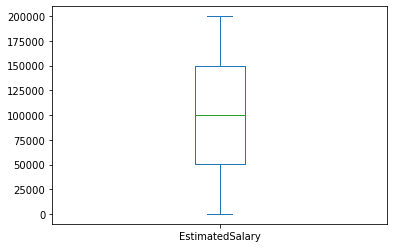

In [80]:
data["EstimatedSalary"].plot(kind="box") # no outliers

In [81]:
EstimatedSalary_value_replacement=data["EstimatedSalary"].median()
data.loc[
    pd.isna(data["EstimatedSalary"])

    ,"EstimatedSalary"

]=EstimatedSalary_value_replacement

<AxesSubplot:>

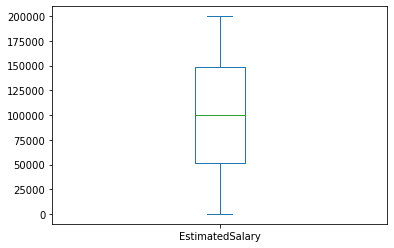

In [82]:
data["EstimatedSalary"].plot(kind="box")

In [83]:
data["EstimatedSalary"].describe()

count     10046.000000
mean     100080.208273
std       57363.436427
min          11.580000
25%       51291.252500
50%      100168.240000
75%      149071.945000
max      199992.480000
Name: EstimatedSalary, dtype: float64

# Exited

In [84]:
pd.isna(data["Exited"]).sum() # has no NaN values

0

In [85]:
data["Exited"].describe()

count    10046.000000
mean         0.203564
std          0.402668
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

<AxesSubplot:>

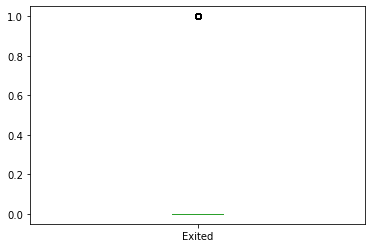

In [86]:
data["Exited"].plot(kind="box") # no outliers

<AxesSubplot:ylabel='Frequency'>

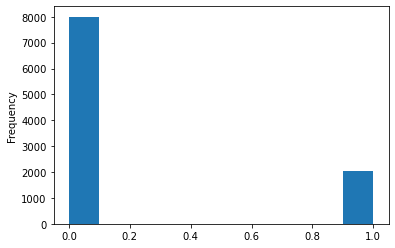

In [87]:
data["Exited"].plot(kind="hist") 

# 5.	Transform categorical variables with your preferred way

In [88]:
data.head(17)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,1.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,6,15574012,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822.0,France,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0
7,8,15656148,Obinna,652.0,Germany,Female,29.0,4.0,115046.74,1.0,1.0,0.0,119346.88,1
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
9,10,15592389,Unknown_Surname,684.0,France,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0


# Geography

In [89]:
# importing Sklearn directories
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [90]:
data["Geography"].value_counts()

France               4941
Germany              2463
Spain                2446
Unknown_Geography     196
Name: Geography, dtype: int64

In [91]:
data["Geography"].tolist()

['France',
 'Spain',
 'France',
 'France',
 'Spain',
 'Spain',
 'France',
 'Germany',
 'France',
 'France',
 'France',
 'Spain',
 'France',
 'Unknown_Geography',
 'Spain',
 'Germany',
 'Germany',
 'Spain',
 'Spain',
 'France',
 'France',
 'Spain',
 'Spain',
 'France',
 'France',
 'France',
 'Unknown_Geography',
 'France',
 'Germany',
 'France',
 'Spain',
 'France',
 'Germany',
 'Spain',
 'Spain',
 'France',
 'Spain',
 'Spain',
 'France',
 'Germany',
 'Spain',
 'France',
 'France',
 'France',
 'Spain',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'France',
 'Germany',
 'Germany',
 'France',
 'France',
 'Germany',
 'Spain',
 'France',
 'Germany',
 'Germany',
 'Spain',
 'Spain',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'France',
 'Germany',
 'France',
 'Spain',
 'Germany',
 'France',
 'France',
 'France',
 'France',
 'Spain',
 'Germany',
 'France',
 'France',
 'France',
 'France',
 'France',
 'Spain',
 'Spain',
 'France',
 'Franc

In [92]:
# use OneHotEncoder method for catagorical data transformation
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)


In [93]:
# transforming data using OneHotEncoder
Geography_encoded = one_hot_encoder.fit_transform(
    data[["Geography"]] )

In [94]:
#Convert transformed data to panda dataframe for visuization
Geography_df = pd.DataFrame(
    Geography_encoded,
    index=data.index,
    columns=one_hot_encoder.categories_,
).astype(int)
Geography_df

,France,Germany,Spain,Unknown_Geography
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7511,1,0,0,0
8610,1,0,0,0
2997,1,0,0,0
3856,0,1,0,0


In [95]:
Geography_df.columns = [x[0] for x in Geography_df.columns]

In [96]:
# Concatinate the above dataframe with our main csv dataframe
data = pd.concat(
    [data, Geography_df],
    axis=1
)

In [97]:
# Dropping the main colum that was transformed
data.drop("Geography", axis=1, inplace=True)

In [98]:
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Unknown_Geography
0,1,15634602,Hargrave,619.0,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1,1,0,0,0
1,2,15647311,Hill,608.0,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0,0,1,0
2,3,15619304,Onio,502.0,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,1,0,0,0
3,4,15701354,Boni,699.0,Female,39.0,1.0,0.00,2.0,0.0,1.0,93826.63,0,1,0,0,0
4,5,15737888,Mitchell,850.0,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0,0,1,0
5,6,15574012,Chu,645.0,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1,0,0,1,0
6,7,15592531,Bartlett,822.0,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0,1,0,0,0
7,8,15656148,Obinna,652.0,Female,29.0,4.0,115046.74,1.0,1.0,0.0,119346.88,1,0,1,0,0
8,9,15792365,He,501.0,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0,1,0,0,0
9,10,15592389,Unknown_Surname,684.0,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0,1,0,0,0


# Gender

In [99]:
data["Gender"].value_counts()# visulizing 

Male              5323
Female            4440
Unknown_Gender     283
Name: Gender, dtype: int64

In [100]:
Gender_encoded = one_hot_encoder.fit_transform(
    data[["Gender"]] )

In [101]:
Gender_df = pd.DataFrame(
    Gender_encoded,
    index=data.index,
    columns=one_hot_encoder.categories_,
).astype(int)
Gender_df

,Female,Male,Unknown_Gender
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7511,0,1,0
8610,0,1,0
2997,1,0,0
3856,1,0,0


In [102]:
data = pd.concat(
    [data, Gender_df],
    axis=1
)

In [103]:
data.drop("Gender", axis=1, inplace=True)

In [104]:
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Unknown_Geography,"(Female,)","(Male,)","(Unknown_Gender,)"
0,1,15634602,Hargrave,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1,1,0,0,0,1,0,0
1,2,15647311,Hill,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0,0,1,0,1,0,0
2,3,15619304,Onio,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,1,0,0,0,1,0,0
3,4,15701354,Boni,699.0,39.0,1.0,0.00,2.0,0.0,1.0,93826.63,0,1,0,0,0,1,0,0
4,5,15737888,Mitchell,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0,0,1,0,1,0,0
5,6,15574012,Chu,645.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1,0,0,1,0,0,1,0
6,7,15592531,Bartlett,822.0,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0,1,0,0,0,0,1,0
7,8,15656148,Obinna,652.0,29.0,4.0,115046.74,1.0,1.0,0.0,119346.88,1,0,1,0,0,1,0,0
8,9,15792365,He,501.0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0,1,0,0,0,0,1,0
9,10,15592389,Unknown_Surname,684.0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0,1,0,0,0,0,1,0


# 6.	Scale the data set

In [105]:
from sklearn.preprocessing import MinMaxScaler #scaling data using MinMax Scale

In [106]:
scaler = MinMaxScaler()

# CreditScore

In [107]:
data["CreditScore"].dtypes

dtype('float64')

In [108]:
Scaled_CreditScore = scaler.fit_transform(data[["CreditScore"]]) #transform and fit scaled data
Scaled_CreditScore

array([[0.48552339],
       [0.4610245 ],
       [0.22494432],
       ...,
       [0.56570156],
       [0.61915367],
       [0.52115813]])

In [109]:
# coverting scaled data to panda dataframe for visulization
Scaled_CreditScore_df = pd.DataFrame(
    Scaled_CreditScore,
    index=data.index   
)
Scaled_CreditScore_df.columns=["Scaled_CreditScore"]
Scaled_CreditScore_df

,Scaled_CreditScore
0,0.485523
1,0.461024
2,0.224944
3,0.663697
4,1.000000
...,...
7511,0.792873
8610,0.732739
2997,0.565702
3856,0.619154


In [110]:
#displaying orignal and scaled data side by side
DC=pd.concat(
    [data["CreditScore"], Scaled_CreditScore_df],
    axis=1
)
DC

,CreditScore,Scaled_CreditScore
0,619.0,0.485523
1,608.0,0.461024
2,502.0,0.224944
3,699.0,0.663697
4,850.0,1.000000
...,...,...
7511,757.0,0.792873
8610,730.0,0.732739
2997,655.0,0.565702
3856,679.0,0.619154


In [111]:
DC.describe()

,CreditScore,Scaled_CreditScore
count,10046.000000,10046.000000
mean,651.058929,0.556924
std,95.670487,0.213075
min,401.000000,0.000000
25%,584.000000,0.407572
50%,652.000000,0.559020
75%,717.000000,0.703786
max,850.000000,1.000000


# Age

In [112]:
data["Age"].dtypes

dtype('float64')

In [113]:
# transforming scaled data
Scaled_Age = scaler.fit_transform(data[["Age"]])
Scaled_Age


array([[0.52380952],
       [0.5       ],
       [0.52380952],
       ...,
       [0.14285714],
       [0.28571429],
       [0.4047619 ]])

In [114]:
#Convert data to panda data frame for visuization
Scaled_Age_df = pd.DataFrame(
    Scaled_Age,
    index=data.index
   
)
Scaled_Age_df.columns=["Scaled_Age"]
Scaled_Age_df


,Scaled_Age
0,0.523810
1,0.500000
2,0.523810
3,0.452381
4,0.547619
...,...
7511,0.404762
8610,0.071429
2997,0.142857
3856,0.285714


In [115]:
#displaying orignal and scaled data side by side
DA=pd.concat(
    [data["Age"], Scaled_Age_df],
    axis=1
)
DA

,Age,Scaled_Age
0,42.0,0.523810
1,41.0,0.500000
2,42.0,0.523810
3,39.0,0.452381
4,43.0,0.547619
...,...,...
7511,37.0,0.404762
8610,23.0,0.071429
2997,26.0,0.142857
3856,32.0,0.285714


# Tenure

In [116]:
# transforming scaled data
Scaled_Tenure = scaler.fit_transform(data[["Tenure"]])
#Convert data to panda data frame for visuization
Scaled_Tenure_df = pd.DataFrame(
    Scaled_Tenure,
    index=data.index
   
)
Scaled_Tenure_df.columns=["Scaled_Tenure"]
Scaled_Tenure_df

,Scaled_Tenure
0,0.2
1,0.1
2,0.8
3,0.1
4,0.2
...,...
7511,0.0
8610,0.8
2997,0.5
3856,0.0


In [117]:
#displaying orignal and scaled data side by side
DT=pd.concat(
    [data["Tenure"], Scaled_Tenure_df],
    axis=1
)
DT

,Tenure,Scaled_Tenure
0,2.0,0.2
1,1.0,0.1
2,8.0,0.8
3,1.0,0.1
4,2.0,0.2
...,...,...
7511,0.0,0.0
8610,8.0,0.8
2997,5.0,0.5
3856,0.0,0.0


# NumOfProducts

In [118]:
# transforming scaled data
Scaled_NumOfProducts = scaler.fit_transform(data[["NumOfProducts"]])

#Convert data to panda data frame for visuization
Scaled_NumOfProducts_df = pd.DataFrame(
    Scaled_NumOfProducts,
    index=data.index
   
)
Scaled_NumOfProducts_df.columns=["Scaled_NumOfProducts"]
Scaled_NumOfProducts_df

,Scaled_NumOfProducts
0,0.0
1,0.0
2,1.0
3,0.5
4,0.0
...,...
7511,0.0
8610,0.5
2997,0.0
3856,0.0


In [119]:
#displaying orignal and scaled data side by side
DN=pd.concat(
    [data["NumOfProducts"], Scaled_NumOfProducts_df],
    axis=1
)
DN

,NumOfProducts,Scaled_NumOfProducts
0,1.0,0.0
1,1.0,0.0
2,3.0,1.0
3,2.0,0.5
4,1.0,0.0
...,...,...
7511,1.0,0.0
8610,2.0,0.5
2997,1.0,0.0
3856,1.0,0.0


In [120]:
DN.describe()

,NumOfProducts,Scaled_NumOfProducts
count,10046.000000,10046.000000
mean,1.495919,0.247959
std,0.548615,0.274308
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.500000
max,3.000000,1.000000


# Save to csv

In [121]:
data.to_csv("Assingment_1.csv", sep=",", header=True, index=True)